In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BankNote_Authentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [5]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
X = df.values[:, :-1]
y = df.values[:, -1]

In [7]:
#Ensure all values are string

X = X.astype('float32')

In [8]:
print(y)

[0. 0. 0. ... 1. 1. 1.]


In [9]:
# convert y values from float to int

enc = LabelEncoder()
y = enc.fit_transform(y)

In [10]:
print(y)

[0 0 0 ... 1 1 1]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [12]:
X_train.shape, y_train.shape

((1097, 4), (1097,))

In [13]:
X_test.shape, y_test.shape

((275, 4), (275,))

In [14]:
model = Sequential()

model.add(Flatten(input_shape = (4,)))

model.add(Dense(10, kernel_initializer = 'ones', bias_initializer = 'zeros', activation='relu'))

model.add(Dense(3, activation='softmax'))        


model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


**Here, we Initialize coordinates weights = 1 and bias = 0**

In [15]:
checkpoint = ModelCheckpoint("ANN_BankNote.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs= 50, 
                    verbose = 1, callbacks= [checkpoint])

Epoch 1/50
35/35 [==============================] - 2s 30ms/step - loss: 10.2266 - accuracy: 0.0650 - val_loss: 7.7124 - val_accuracy: 0.1055

Epoch 00001: loss improved from inf to 9.47698, saving model to ANN_BankNote.hdf5
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 6.9060 - accuracy: 0.0706 - val_loss: 4.5180 - val_accuracy: 0.1091

Epoch 00002: loss improved from 9.47698 to 6.18711, saving model to ANN_BankNote.hdf5
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 3.6937 - accuracy: 0.1122 - val_loss: 1.6655 - val_accuracy: 0.2218

Epoch 00003: loss improved from 6.18711 to 3.03633, saving model to ANN_BankNote.hdf5
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 1.2238 - accuracy: 0.2877 - val_loss: 0.6680 - val_accuracy: 0.5127

Epoch 00004: loss improved from 3.03633 to 1.00441, saving model to ANN_BankNote.hdf5
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 0.6113 - accuracy: 0.5

35/35 [==============================] - 0s 3ms/step - loss: 0.1429 - accuracy: 0.9852 - val_loss: 0.1587 - val_accuracy: 0.9855

Epoch 00037: loss improved from 0.14772 to 0.14320, saving model to ANN_BankNote.hdf5
Epoch 38/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1393 - accuracy: 0.9846 - val_loss: 0.1540 - val_accuracy: 0.9891

Epoch 00038: loss improved from 0.14320 to 0.13881, saving model to ANN_BankNote.hdf5
Epoch 39/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1288 - accuracy: 0.9911 - val_loss: 0.1492 - val_accuracy: 0.9891

Epoch 00039: loss improved from 0.13881 to 0.13456, saving model to ANN_BankNote.hdf5
Epoch 40/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1342 - accuracy: 0.9791 - val_loss: 0.1449 - val_accuracy: 0.9891

Epoch 00040: loss improved from 0.13456 to 0.13045, saving model to ANN_BankNote.hdf5
Epoch 41/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1271 - accuracy: 0.9875 -

In [16]:
weights = model.layers[2].get_weights()[0]
biases = model.layers[2].get_weights()[1]

In [17]:
print("Final weights : ",weights)

Final weights :  [[-0.49908352  0.4846833   0.36593276]
 [-0.03604472 -0.7307762  -0.19873704]
 [ 0.7373599  -0.075313   -0.84761214]
 [-0.24157093  0.19155434 -0.9493832 ]
 [-0.01358509  0.41301066 -0.1245819 ]
 [ 0.17042819 -0.25038078 -0.16851658]
 [-0.40915003 -0.5189591   0.28868663]
 [-0.40207174  0.5066915   0.34979096]
 [ 0.7208406   0.10519055 -0.34082302]
 [ 0.8385026   0.4967235  -0.08603296]]


In [18]:
print("Final Bias: ",biases)

Final Bias:  [-0.6494338   0.99271864 -1.0626649 ]


In [19]:
_, train_acc = model.evaluate(X_train, y_train)
_, test_acc = model.evaluate(X_test, y_test)

print("\nTrain_Accuracy : %.3f, Test_Accuracy: %.3f" %(train_acc, test_acc))

9/9 [==============================] - 0s 2ms/step - loss: 0.1091 - accuracy: 0.9927

Train_Accuracy : 0.988, Test_Accuracy: 0.993


**Lets predict on some unseen data**

In [20]:
row = [3.6216,8.6661,-2.8073,-0.44699]

y_predict = model.predict_classes([row])

In [21]:
y_predict[0]

0

In [22]:
row = [-4.6216,-15.451,12.8073,-1.44699]

y_predict = model.predict_classes([row])

In [23]:
y_predict[0]

1

In [24]:
y_predicton = model.predict(X_test)
y_predicton = np.argmax(y_predicton, axis = 1)

print(classification_report(y_test, y_predicton))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       148
           1       0.98      1.00      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



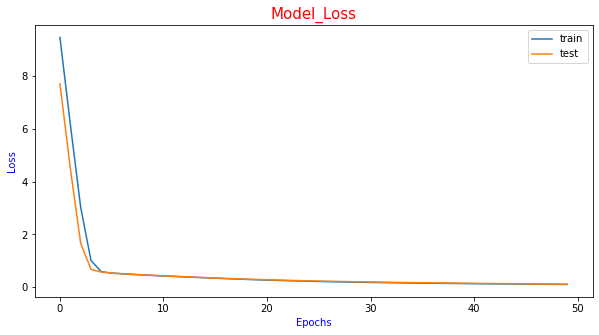

In [25]:
# plot loss during training
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model_Loss',size = 15, color = 'r')
plt.xlabel('Epochs', size = 10, color = 'b')
plt.ylabel('Loss', size = 10, color = 'b')
plt.legend()
plt.show()

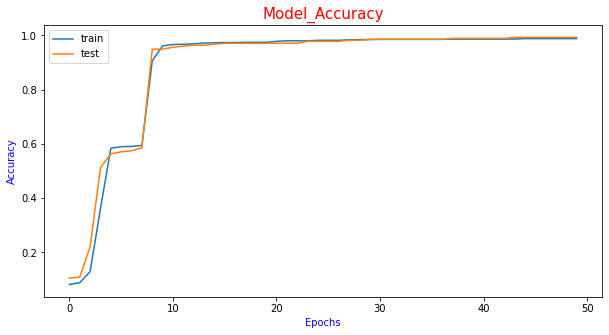

In [26]:
# plot Accuracy during training
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model_Accuracy', size = 15, color= 'r')
plt.xlabel('Epochs', size = 10, color = 'b')
plt.ylabel('Accuracy', size = 10, color = 'b')
plt.legend()

# Thank You